In [13]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_text, plot_tree
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
import ipywidgets as widgets
from IPython.display import display
import os

sns.set(style="whitegrid")

In [14]:

from google.colab import files

# Uploading the file
uploaded = files.upload()

# Loading the dataset
data = pd.read_csv('exams.csv')

# Displaying the first 5 rows of the dataset
data.head()

Saving exams.csv to exams (3).csv


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [15]:
# Checking for missing values
missing_values = data.isnull().sum()
print(missing_values)

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [16]:
# One-hot encoding categorical variables
categorical_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
encoded_data = pd.get_dummies(data, columns=categorical_features)

In [17]:
# Predicting math, reading, and writing scores
target = encoded_data[['math score', 'reading score', 'writing score']]
features = encoded_data.drop(['math score', 'reading score', 'writing score'], axis=1)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Print training and testing sets
print(f'Training set: {X_train.shape}, Testing set: {X_test.shape}')

Training set: (800, 17), Testing set: (200, 17)


Mean Absolute Error: 10.85248048941799
Mean Squared Error: 179.19150695522174
R-squared: 0.06652869134364377


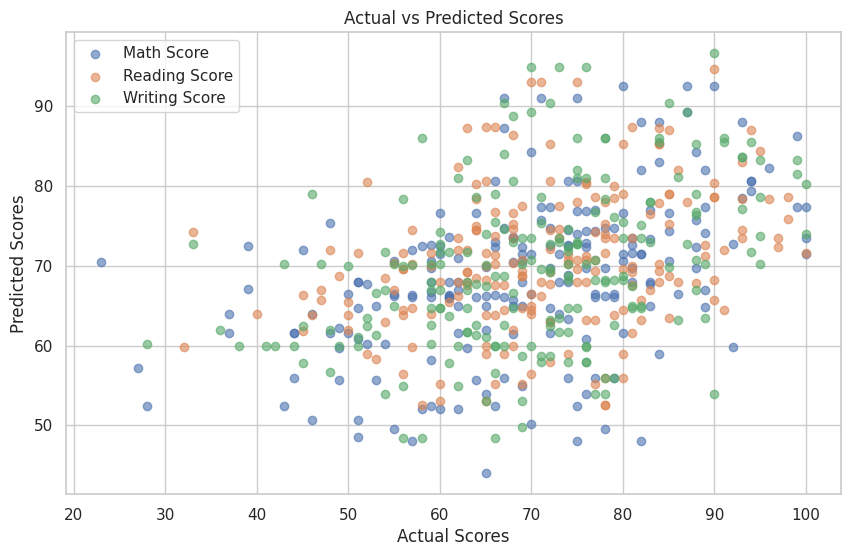

In [18]:
# Training the Decision Tree Regressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

# Making the predictions
y_pred = regressor.predict(X_test)

# Evaluating the model for each score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# R-squared score
r2 = regressor.score(X_test, y_test)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Actual vs predicted scores for math, reading, and writing
plt.figure(figsize=(10, 6))
plt.scatter(y_test['math score'], y_pred[:, 0], label='Math Score', alpha=0.6)
plt.scatter(y_test['reading score'], y_pred[:, 1], label='Reading Score', alpha=0.6)
plt.scatter(y_test['writing score'], y_pred[:, 2], label='Writing Score', alpha=0.6)
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.legend()
plt.title('Actual vs Predicted Scores')
plt.show()

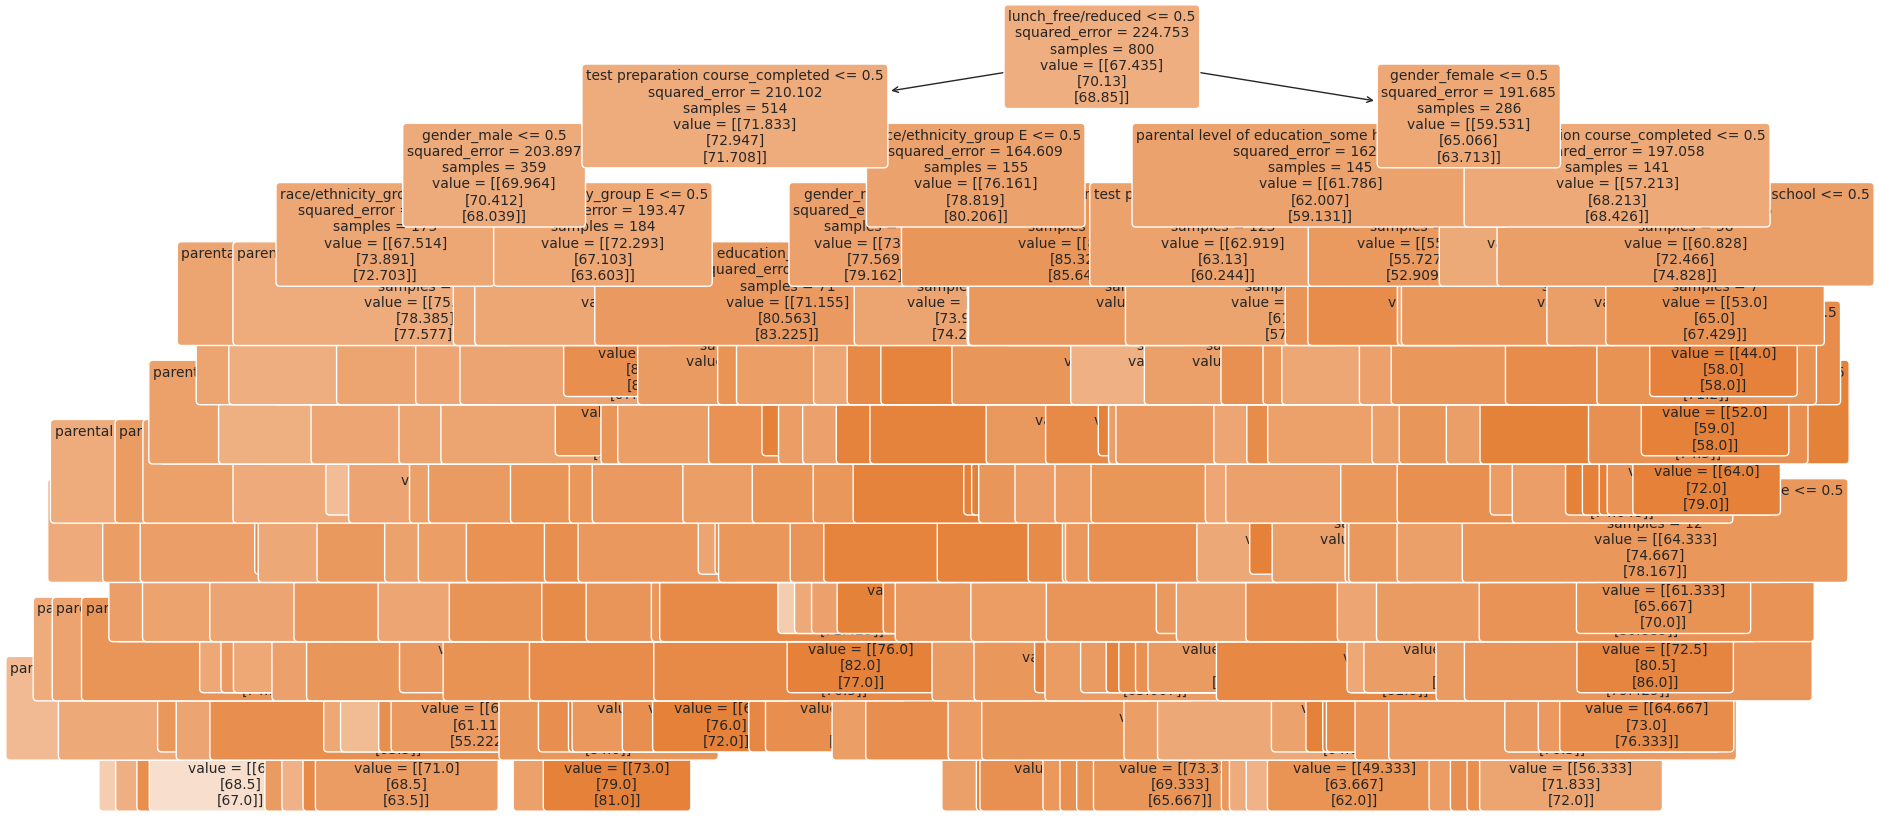

In [19]:
# Showing the Decision Tree Algorithtim using a plot tree
plt.figure(figsize=(20, 10))
plot_tree(regressor, feature_names=X_train.columns, filled=True, rounded=True, fontsize=10)
plt.show()

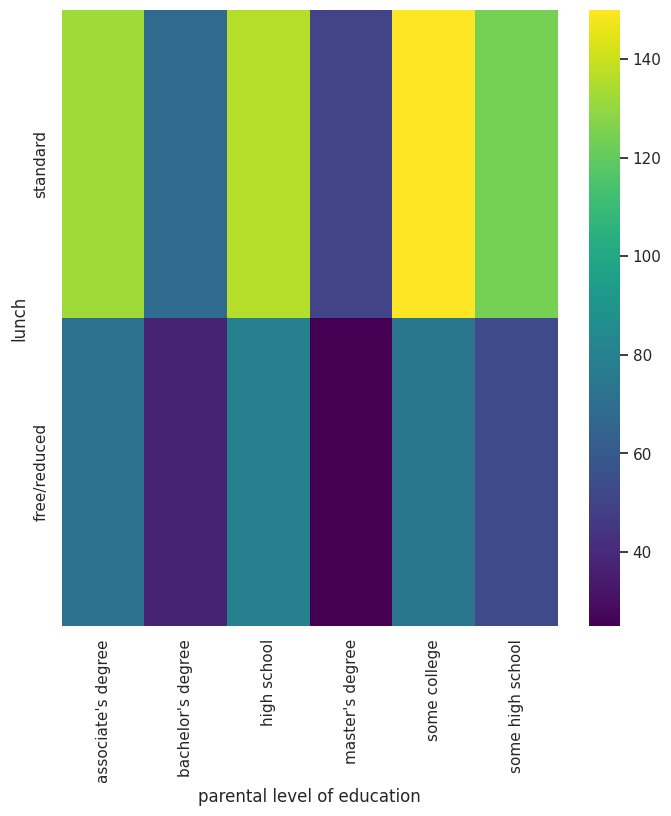

In [20]:
# Parental level of education vs Lunch

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['lunch'].value_counts()
    for x_label, grp in data.groupby('parental level of education')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('parental level of education')
_ = plt.ylabel('lunch')

<ipython-input-21-a91fd35b6375>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data, x='math score', y='gender', inner='box', palette='Dark2')


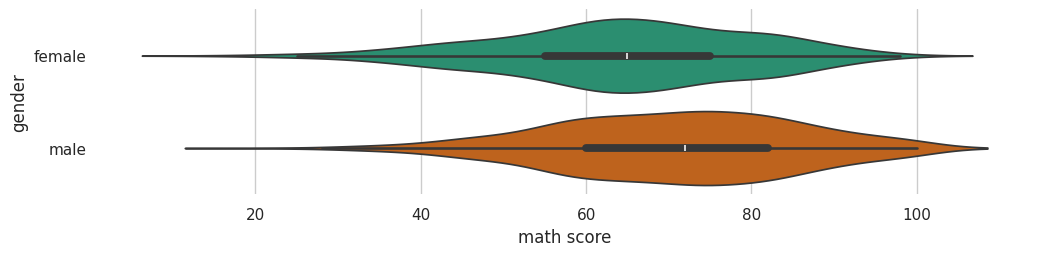

In [21]:

# Gender vs Math score

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='math score', y='gender', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)


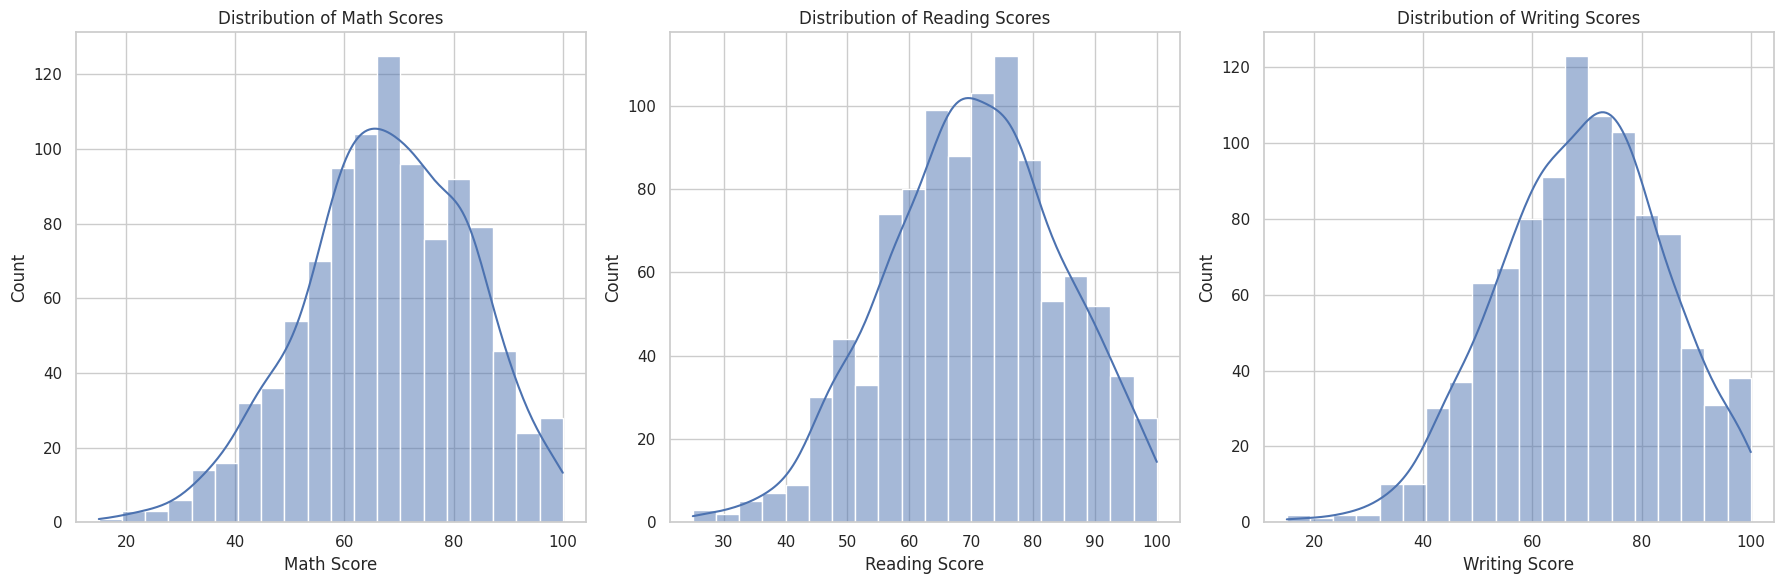

In [22]:
# Plotting the scores
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Math Scores
sns.histplot(data['math score'], bins=20, kde=True, ax=ax[0])
ax[0].set_title('Distribution of Math Scores')
ax[0].set_xlabel('Math Score')

# Reading Scores
sns.histplot(data['reading score'], bins=20, kde=True, ax=ax[1])
ax[1].set_title('Distribution of Reading Scores')
ax[1].set_xlabel('Reading Score')

# Writing Scores
sns.histplot(data['writing score'], bins=20, kde=True, ax=ax[2])
ax[2].set_title('Distribution of Writing Scores')
ax[2].set_xlabel('Writing Score')

plt.tight_layout()
plt.show()

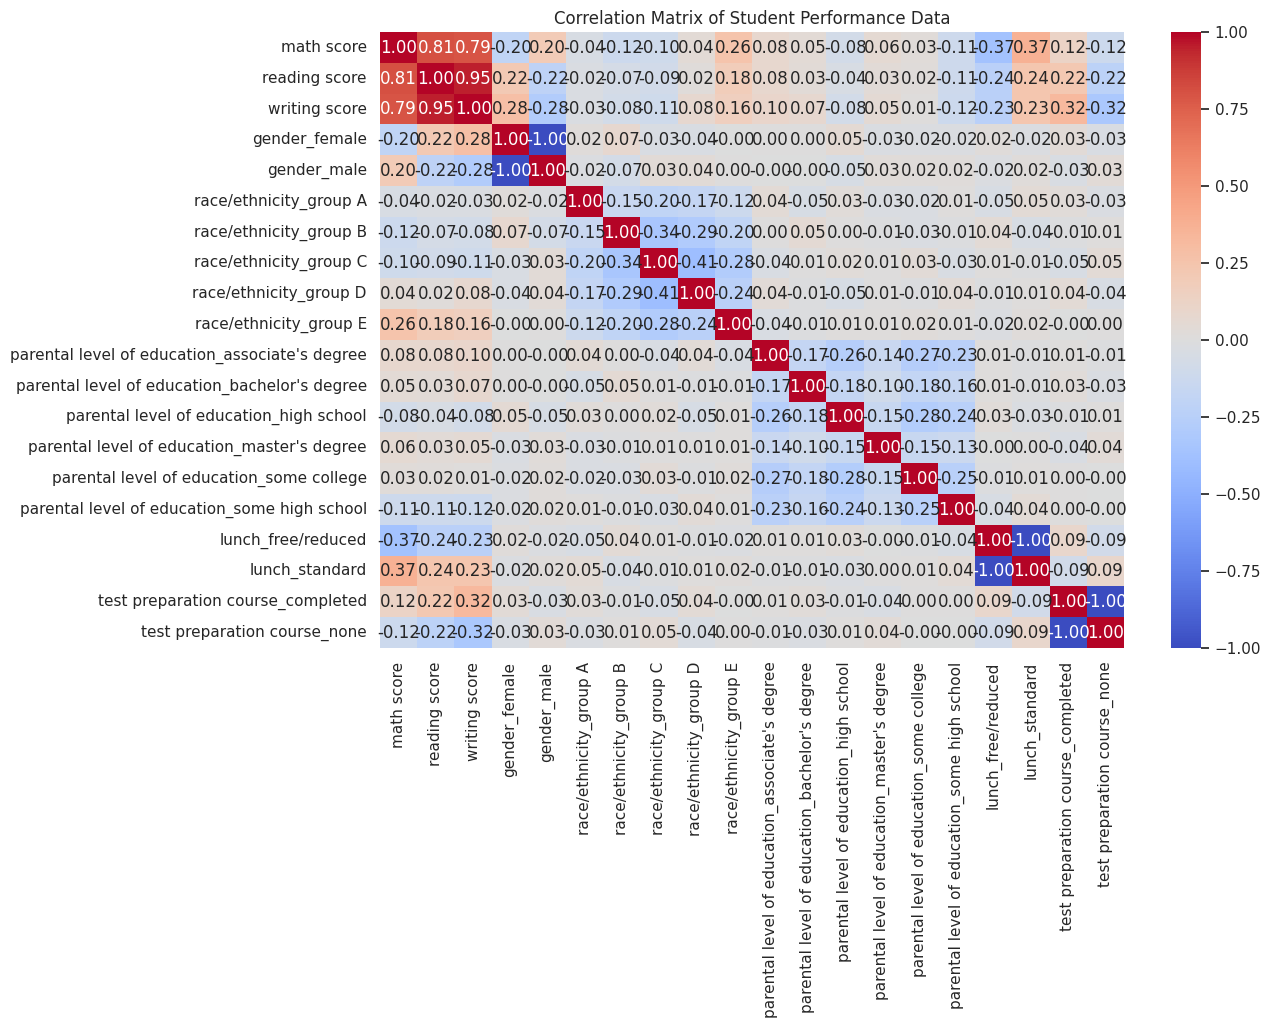

In [23]:
# Matrix Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(encoded_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Student Performance Data')
plt.show()

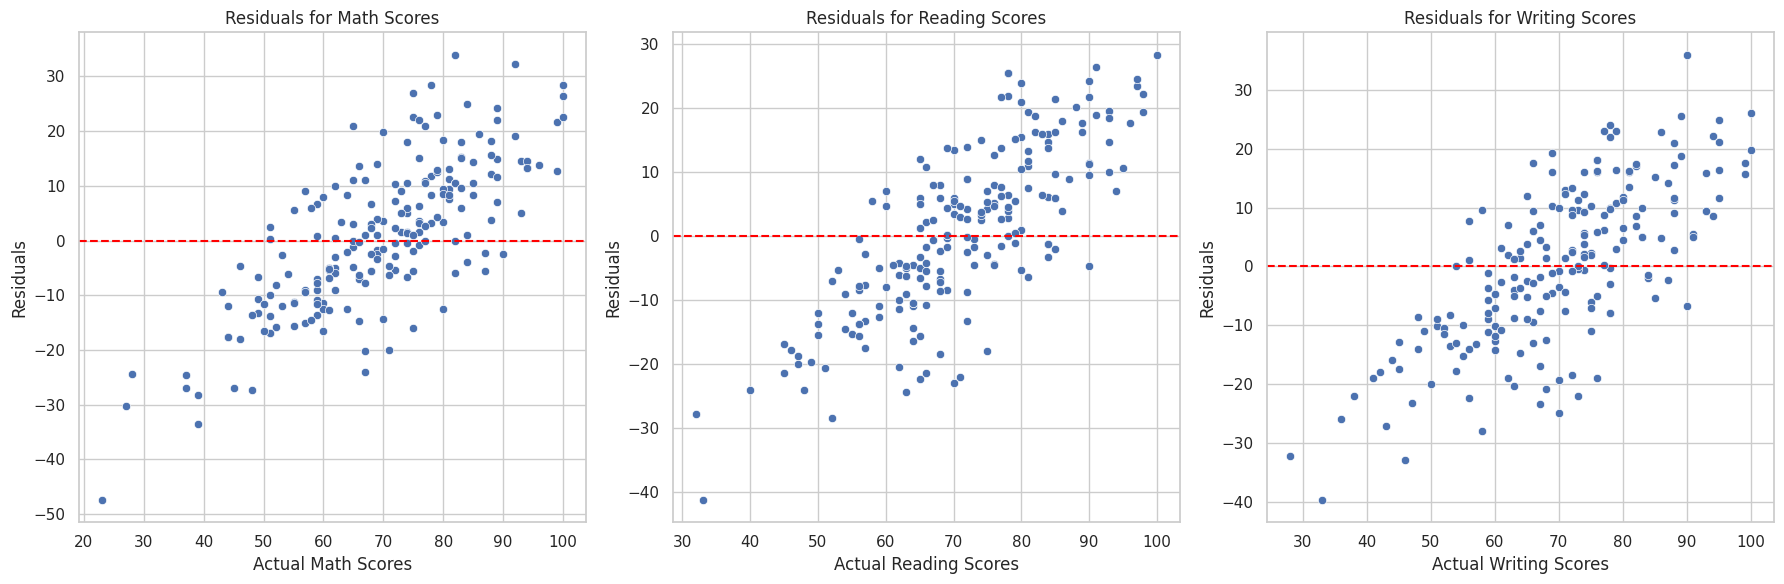

In [24]:
# Residual Plots for each score
y_test_math = y_test['math score']
y_test_reading = y_test['reading score']
y_test_writing = y_test['writing score']

residuals_math = y_test_math - y_pred[:, 0]
residuals_reading = y_test_reading - y_pred[:, 1]
residuals_writing = y_test_writing - y_pred[:, 2]

plt.figure(figsize=(18, 6))

# Math Residual Plot
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test_math, y=residuals_math)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual Math Scores')
plt.ylabel('Residuals')
plt.title('Residuals for Math Scores')

# Reading Residual Plot
plt.subplot(1, 3, 2)
sns.scatterplot(x=y_test_reading, y=residuals_reading)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual Reading Scores')
plt.ylabel('Residuals')
plt.title('Residuals for Reading Scores')

# Writing Residual Plot
plt.subplot(1, 3, 3)
sns.scatterplot(x=y_test_writing, y=residuals_writing)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual Writing Scores')
plt.ylabel('Residuals')
plt.title('Residuals for Writing Scores')

plt.tight_layout()
plt.show()

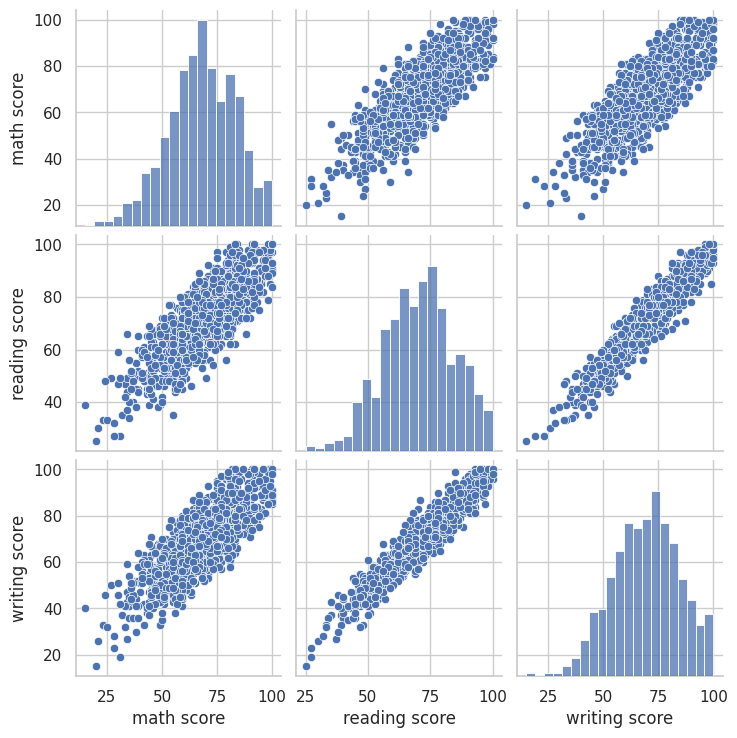

In [25]:
# Pair Plot
sns.pairplot(encoded_data[['math score', 'reading score', 'writing score']])
plt.show()

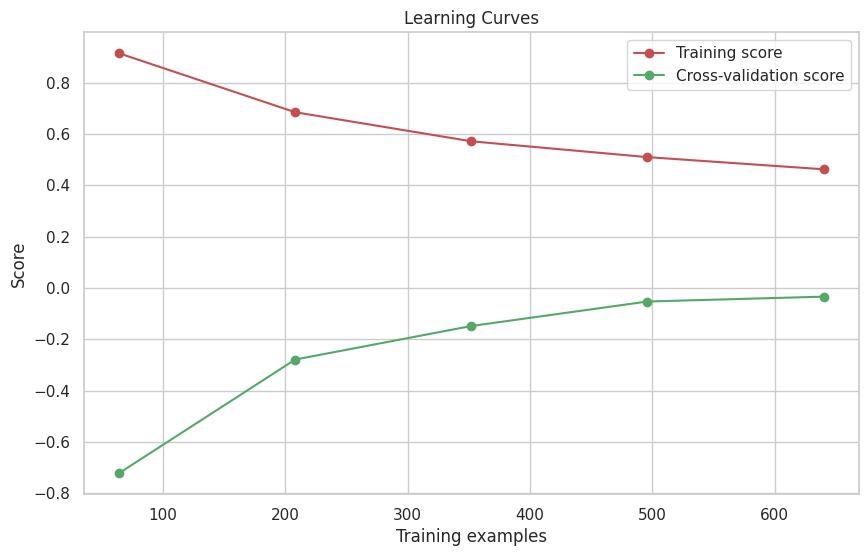

In [26]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(DecisionTreeRegressor(), X_train, y_train, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend(loc='best')
plt.show()

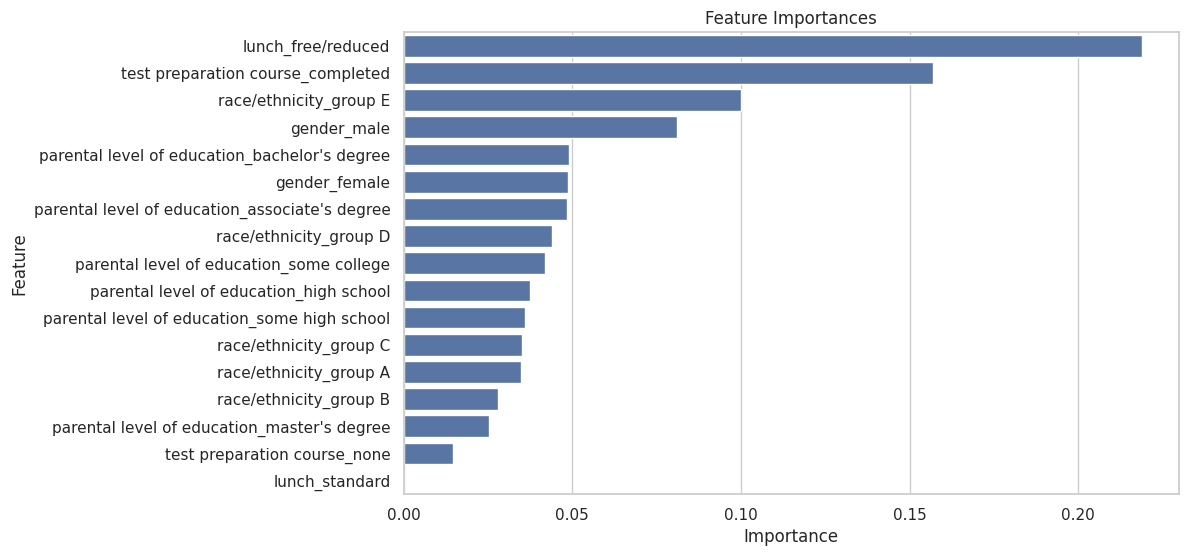

In [27]:
if hasattr(regressor, "feature_importances_"):

    feature_importances = regressor.feature_importances_
    features = X_train.columns

    feature_importance_df = pd.DataFrame({
        'Feature': features,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title('Feature Importances')
    plt.show()

In [28]:
# User Interface
gender_widget = widgets.Dropdown(
    options=['female', 'male'],
    description='Gender:',
)
race_widget = widgets.Dropdown(
    options=['group A', 'group B', 'group C', 'group D', 'group E'],
    description='Race:',
)
parent_education_widget = widgets.Dropdown(
    options=["some high school", "high school", "some college", "associate's degree", "bachelor's degree", "master's degree"],
    description='Parent Edu:',
)
lunch_widget = widgets.Dropdown(
    options=['standard', 'free/reduced'],
    description='Lunch:',
)
prep_course_widget = widgets.Dropdown(
    options=['none', 'completed'],
    description='Prep Course:',
)

# Button for the prediction
predict_button = widgets.Button(description="Predict Scores")

# Displaying the widgets
display(gender_widget, race_widget, parent_education_widget, lunch_widget, prep_course_widget, predict_button)

def predict_scores(b):

    # Create a data frame with the input data
    input_data = pd.DataFrame({
        'gender': [gender_widget.value],
        'race/ethnicity': [race_widget.value],
        'parental level of education': [parent_education_widget.value],
        'lunch': [lunch_widget.value],
        'test preparation course': [prep_course_widget.value]
    })

    # One-hot encode the input data
    input_data_encoded = pd.get_dummies(input_data)
    input_data_encoded = input_data_encoded.reindex(columns=X_train.columns, fill_value=0)

    # Making the predictions
    predictions = regressor.predict(input_data_encoded)
    print(f"Predicted Math Score: {predictions[0][0]}")
    print(f"Predicted Reading Score: {predictions[0][1]}")
    print(f"Predicted Writing Score: {predictions[0][2]}")

# Attaches the prediction function to the button
predict_button.on_click(predict_scores)

Dropdown(description='Gender:', options=('female', 'male'), value='female')

Dropdown(description='Race:', options=('group A', 'group B', 'group C', 'group D', 'group E'), value='group A'…

Dropdown(description='Parent Edu:', options=('some high school', 'high school', 'some college', "associate's d…

Dropdown(description='Lunch:', options=('standard', 'free/reduced'), value='standard')

Dropdown(description='Prep Course:', options=('none', 'completed'), value='none')

Button(description='Predict Scores', style=ButtonStyle())

Predicted Math Score: 65.66666666666667
Predicted Reading Score: 70.0
Predicted Writing Score: 69.0
Predicted Math Score: 71.0
Predicted Reading Score: 68.5
Predicted Writing Score: 63.5
